# Advertising dataset problem statement to find the effect of diferent advertising mode on sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
os.getcwd()


'/Users/punchh_adityas/Desktop/python/9th_oct_22'

In [2]:
df = pd.read_csv("../datasets/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,450.0,17.5,69.2,22.1
1,2,44.5,18.5,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,NaN,18.9,58.5,18.5
4,5,180.8,15.8,58.4,12.9


In [4]:
# lets drop unwanted column (Unnamed)

In [5]:
df = df.drop(["Unnamed: 0"], axis =1 )

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,450.0,17.5,69.2,22.1
1,44.5,18.5,45.1,10.4
2,17.2,45.9,69.3,9.3
3,NaN,18.9,58.5,18.5
4,180.8,15.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         197 non-null    float64
 1   Radio      197 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,197.0,149.696954,90.235859,0.7,73.400,149.80,220.3,450.0
Radio,197.0,22.993401,14.665662,0.0,10.100,21.70,35.6,49.6
Newspaper,200.0,30.750000,22.179668,0.3,12.750,25.75,45.1,114.0
Sales,200.0,14.022500,5.217457,1.6,10.375,12.90,17.4,27.0


In [11]:
#  skewness and Kurtosis 
df.skew() # should be between -3 to 3. If its in the range then it means its normally distributed else not

TV           0.143365
Radio        0.137004
Newspaper    0.937312
Sales        0.407571
dtype: float64

In [12]:
df.kurtosis() # should be between -7 to 7. If its in the range then it means its normally distributed else not

TV          -0.618442
Radio       -1.183558
Newspaper    0.715567
Sales       -0.408869
dtype: float64

In [13]:
# after EDA we can work on preprocrssing

In [14]:
# Finding the missing value

In [15]:
df.isnull().sum()

TV           3
Radio        3
Newspaper    0
Sales        0
dtype: int64

In [16]:
df.isnull().sum()/len(df)*100

TV           1.5
Radio        1.5
Newspaper    0.0
Sales        0.0
dtype: float64

In [17]:
len(df)

200

In [18]:
# checking outliers

<AxesSubplot:>

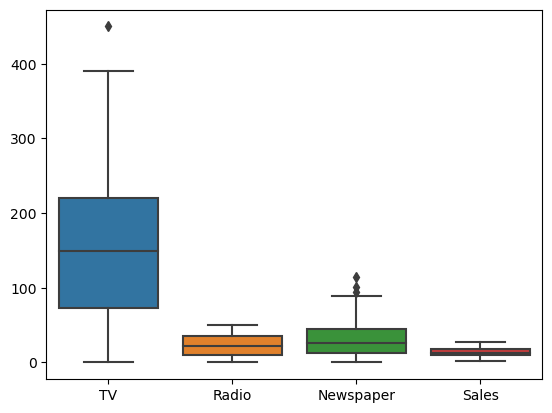

In [19]:
sns.boxplot(data=df)

In [20]:
# we can use histogram also to see the skenwee trend

In [21]:
# Handling the missing value: Mean, median, mode

In [22]:
df['TV'] = df['TV'].fillna(df['TV'].median()) # It will input the median value

In [23]:
df['Radio'] = df['Radio'].fillna(df['Radio'].mean()) # It will input the mean value

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:xlabel='Radio', ylabel='Count'>

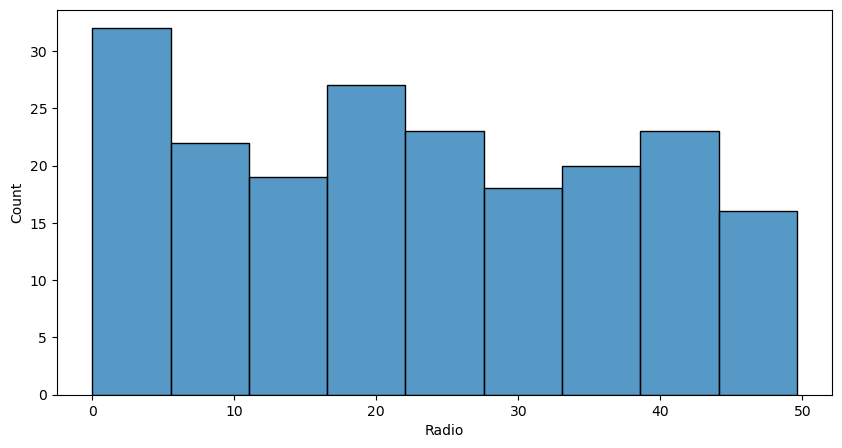

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df["Radio"])

<AxesSubplot:xlabel='Radio', ylabel='Count'>

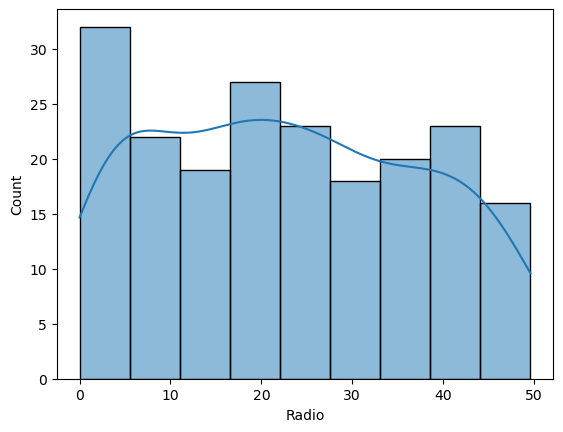

In [26]:
sns.histplot(df["Radio"], kde=True)

<AxesSubplot:xlabel='Radio', ylabel='Density'>

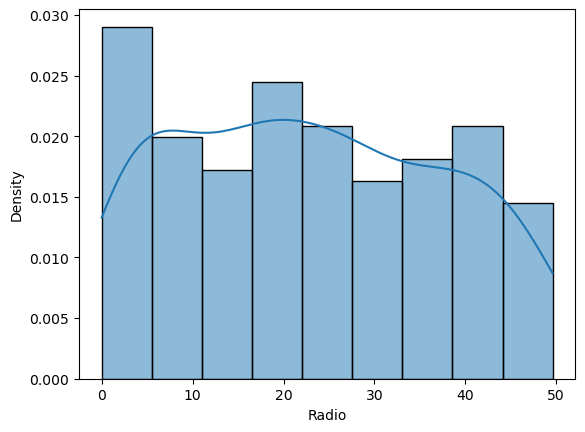

In [27]:
sns.histplot(df["Radio"], stat="density", kde=True)

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

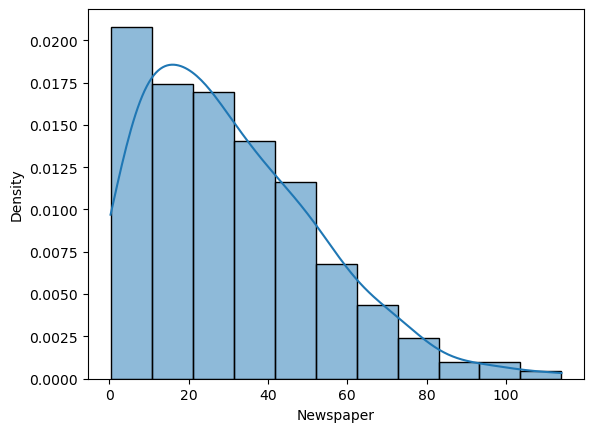

In [28]:
sns.histplot(df["Newspaper"], stat="density", kde=True)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

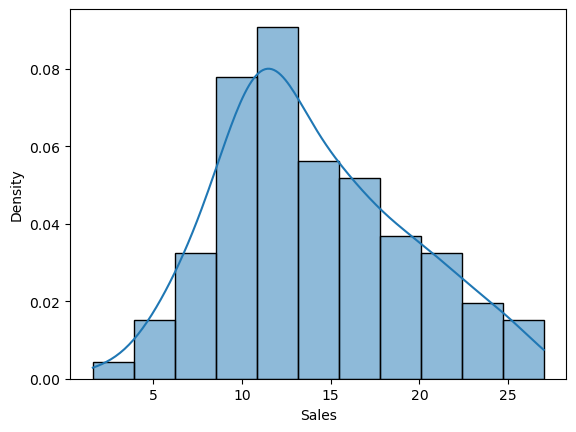

In [30]:
sns.histplot(df["Sales"], stat="density", kde=True)

In [31]:
# Handling outlier - IQR approach

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
Upper_fence = Q3 + 1.5*IQR
Lower_fence = Q1 - 1.5*IQR

print("Upper_fence \n", Upper_fence)
print("Lower_fence \n", Lower_fence)


Upper_fence 
 TV           437.8000
Radio         73.2500
Newspaper     93.6250
Sales         27.9375
dtype: float64
Lower_fence 
 TV          -143.2000
Radio        -27.5500
Newspaper    -35.7750
Sales         -0.1625
dtype: float64


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,149.698500,89.553107,0.7,74.675,149.80,219.925,450.0
Radio,200.0,22.993401,14.554697,0.0,10.250,22.15,35.450,49.6
Newspaper,200.0,30.750000,22.179668,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.022500,5.217457,1.6,10.375,12.90,17.400,27.0


In [36]:
df.head()

,TV,Radio,Newspaper,Sales
0,450.0,17.5,69.2,22.1
1,44.5,18.5,45.1,10.4
2,17.2,45.9,69.3,9.3
3,149.8,18.9,58.5,18.5
4,180.8,15.8,58.4,12.9


In [37]:
# Square root approach help us data tranformation towards more normality
# It also do the scaling 
# it also help outlier treatment

In [38]:
df = np.sqrt(df)

In [39]:
df.head()

,TV,Radio,Newspaper,Sales
0,21.213203,4.183300,8.318654,4.701064
1,6.670832,4.301163,6.715653,3.224903
2,4.147288,6.774954,8.324662,3.049590
3,12.239281,4.347413,7.648529,4.301163
4,13.446189,3.974921,7.641989,3.591657


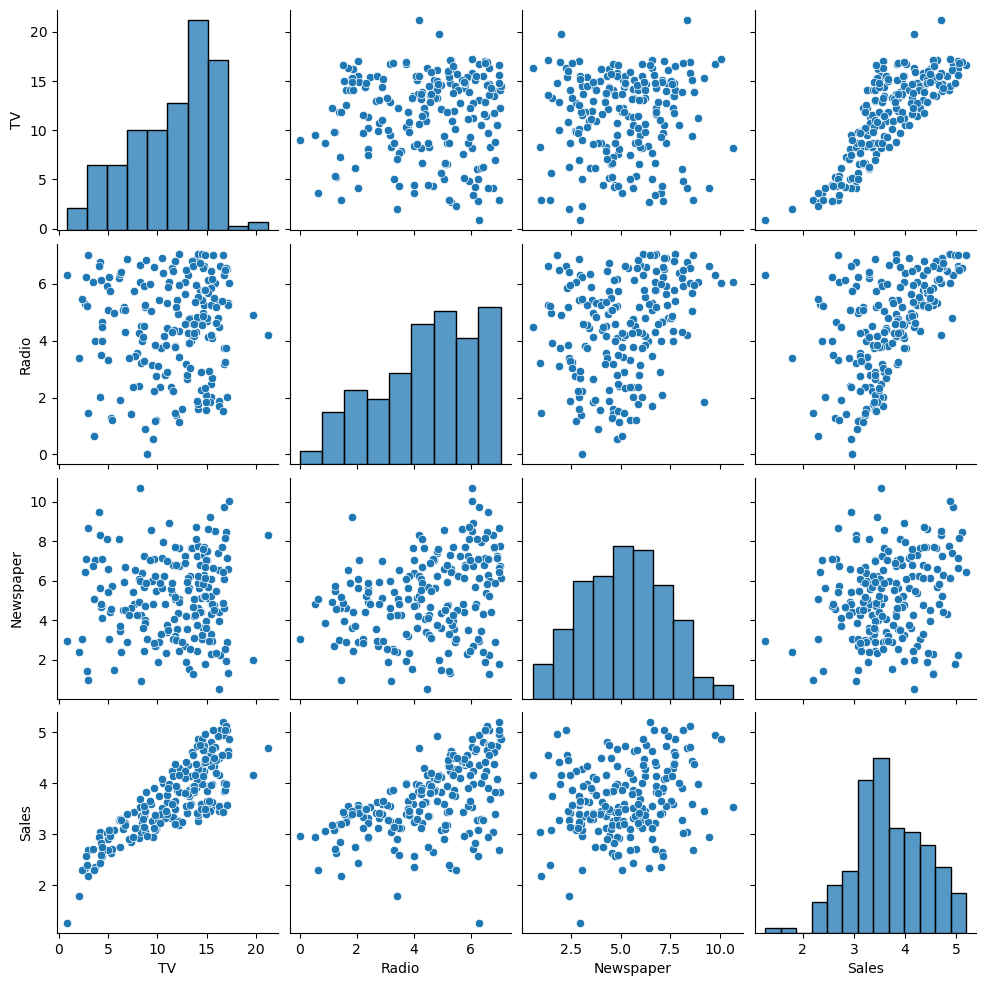

In [41]:
# pairplot 
sns.pairplot(df)

In [45]:
corr = df.corr(method="spearman")

<AxesSubplot:>

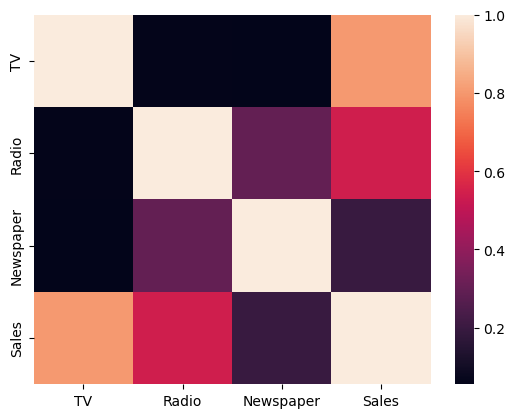

In [46]:
sns.heatmap(corr)

<AxesSubplot:>

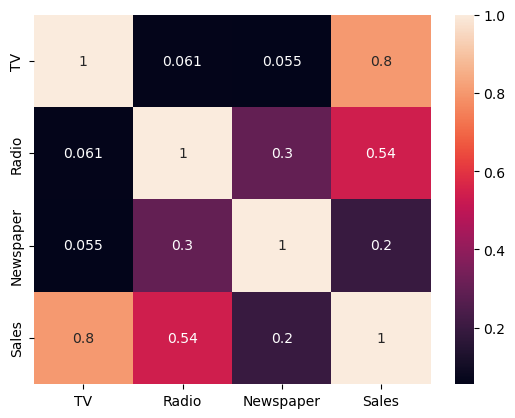

In [44]:
sns.heatmap(corr, annot=True)

In [48]:
df.head()

,TV,Radio,Newspaper,Sales
0,21.213203,4.183300,8.318654,4.701064
1,6.670832,4.301163,6.715653,3.224903
2,4.147288,6.774954,8.324662,3.049590
3,12.239281,4.347413,7.648529,4.301163
4,13.446189,3.974921,7.641989,3.591657


In [67]:
# Now our data is ready to play. We can apply algorithm
# split the data into independent and dependent variables

In [49]:
X = df.drop(["Sales"], axis=1)
Y = df["Sales"]

In [50]:
X.head()

,TV,Radio,Newspaper
0,21.213203,4.183300,8.318654
1,6.670832,4.301163,6.715653
2,4.147288,6.774954,8.324662
3,12.239281,4.347413,7.648529
4,13.446189,3.974921,7.641989


In [51]:
Y.head()

0    4.701064
1    3.224903
2    3.049590
3    4.301163
4    3.591657
Name: Sales, dtype: float64

# Working on OLS Algorithm (Adding a constant is required in this Algorithm)

In [52]:
import statsmodels.api as sm # Required for adding a constant
X = sm.add_constant(X)

In [54]:
X.head()

,const,TV,Radio,Newspaper
0,1.0,21.213203,4.183300,8.318654
1,1.0,6.670832,4.301163,6.715653
2,1.0,4.147288,6.774954,8.324662
3,1.0,12.239281,4.347413,7.648529
4,1.0,13.446189,3.974921,7.641989


In [55]:
# Split the data into training and testing 

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.75, random_state=110)

In [78]:
# Model Building - Linear Regression from sklearn

In [59]:
from sklearn.linear_model import LinearRegression

In [62]:
lin_mod = LinearRegression()

In [63]:
lin_mod.fit(X_train, Y_train)

LinearRegression()

In [64]:
print(lin_mod.intercept_)

1.2238864251966177


In [65]:
print(lin_mod.coef_)

[0.         0.13773378 0.18577039 0.00705425]


In [66]:
# checking the performance of the model

In [67]:
Y_predict = lin_mod.predict(X_test)

In [68]:
print(Y_predict)

[4.20134528 3.64068471 4.71917151 4.42700632 3.19519143 2.97088566
 3.3266001  4.28863953 3.40935108 3.42939435 3.99099486 3.71292441
 4.39725032 4.15101327 2.60693455 4.57111015 4.47473405 4.52670389
 4.80470764 3.256721   3.9593506  3.10443015 4.61572843 4.15321402
 3.29629277 3.75414938 4.40181596 3.04844847 3.47525553 2.82578498
 4.38551014 3.12982345 3.58710061 4.83763441 3.5677335  3.16931856
 3.65999971 4.16091266 3.36643214 4.54433605 3.740562   3.83582357
 3.77971084 3.65083977 3.72844895 3.91218328 4.86810443 1.87558251
 2.84796365 3.83907536]


In [69]:
print(Y_test)

168    4.135215
197    3.577709
147    5.039841
124    4.438468
140    3.301515
65     3.049590
151    3.405877
20     4.242641
71     3.521363
86     3.464102
41     4.135215
100    3.420526
28     4.347413
27     3.987480
119    2.569047
42     4.549725
185    4.753946
55     4.868265
198    5.049752
79     3.316625
118    3.987480
138    3.098387
30     4.626013
187    4.159327
82     3.361547
77     3.768289
53     4.604346
191    3.146427
135    3.405877
10     2.932576
92     4.404543
38     3.178050
116    3.492850
183    5.118594
115    3.549648
29     3.240370
161    3.646917
105    4.381780
6      3.435113
111    4.669047
165    3.449638
25     3.464102
43     3.591657
63     3.741657
181    3.492850
103    3.834058
11     4.171331
108    2.302173
32     3.098387
21     3.535534
Name: Sales, dtype: float64


In [70]:
# How to evaluate the performace -- regrression model
# r2_score -- accuracy
# sum of square error
# absolute error

In [71]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

In [73]:
r2_score(Y_predict, Y_test)

0.9062813385996976

In [75]:
mean_squared_error(Y_predict, Y_test)

0.03868713110924657

In [76]:
median_absolute_error(Y_predict, Y_test)

0.08504739270109618

In [94]:
# Lets make the prediction using OLS method    

In [79]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [83]:
OLS_training = smf.OLS(Y_train, X_train)

In [85]:
OLS_training = OLS_training.fit()

In [86]:
OLS_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     449.1
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.79e-73
Time:                        16:36:33   Log-Likelihood:                 10.374
No. Observations:                 150   AIC:                            -12.75
Df Residuals:                     146   BIC:                           -0.7052
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2239      0.077     15.853      0.000       1.071       1.376
TV             0.1377      0.004     31.991      0.000       0.129       0.146
Radio          0.1858      0.011     16.759      0.000       0.164       0.208
Newspaper      0.0071      0.009      0.746      0.457      -0.012       0.026
==============================================================================
Omnibus:                       48.111   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.598
Skew:                          -1.053   Prob(JB):                     4.61e-49
Kurtosis:                       8.584   Cond. No.                         56.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# If the model is good the Adjusted R-squared must be less than or equal to R-squared value

In [88]:
print(OLS_training.bse)

const        0.077204
TV           0.004305
Radio        0.011085
Newspaper    0.009461
dtype: float64


In [89]:
X1 = X.drop(["TV"], axis=1)

In [91]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y, train_size=0.75,random_state=120)

In [92]:
lin_mod1 = LinearRegression()

In [93]:
lin_mod1.fit(X1_train, Y1_train)

LinearRegression()

In [94]:
Y1_predict = lin_mod1.predict(X1_test)

In [95]:
r2_score(Y1_predict, Y1_test)

-0.7501845317039118

In [96]:
OLS_training1 = smf.OLS(Y, X1)

In [97]:
OLS_training1 = OLS_training1.fit()

In [98]:
OLS_training1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     37.24
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.91e-14
Time:                        16:54:57   Log-Likelihood:                -182.67
No. Observations:                 200   AIC:                             371.3
Df Residuals:                     197   BIC:                             381.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6480      0.143     18.554      0.000       2.367       2.929
Radio          0.2039      0.026      7.910      0.000       0.153       0.255
Newspaper      0.0230      0.022      1.051      0.294      -0.020       0.066
==============================================================================
Omnibus:                       39.769   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.077
Skew:                          -1.077   Prob(JB):                     2.01e-14
Kurtosis:                       4.712   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""